3000


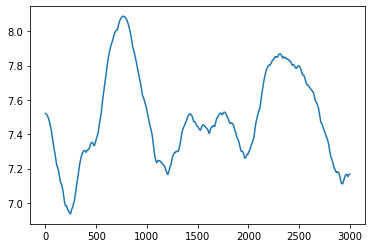

In [133]:
import time,math,random,json,os
from math import remainder
from math import cos,sin,pi
from numpy import arange,array,empty
import pandas as pd
import matplotlib.pyplot as plt
# Defining the particle class


#Opening the cache
cache = open("SpeedTesting.json")
world = {}

world = json.loads(json.load(cache))

count = world['Count']
FrameCount = world['FrameCount']
for n in range(count):
   coordinates = (world["frames"][0][n])
   x = float(coordinates[0])
   y = float(coordinates[1])
   z = float(coordinates[2])
   seed = random.randint(0,2)


print(FrameCount)
#    To modify the initial momentum vector, change the above value under vp.vector() to whatever force vector you can calculate
averageMag = []
for i in range(FrameCount):
    magnitude = []
    # each index here is the magnitude of the particle whose number is that index
    for n in range(count):
        # the x position of the particle is equal to the "frame"  'i' at the particle 'n's coordinates, at 0 in the coordinate array
        # vp.s[n].pos.x = float(world["frames"][str(i)][str(n)][0])
        coordinates = (world["frames"][i][n])
        x=coordinates[0]
        y=coordinates[1]
        z=coordinates[2]
        magnitude.append((x**2+y**2+z**2)**.5)
        # print("the cordinates of particle" + str(n) + ' at ' + str(i) + " are : " + str(coordinates))
        total = 0
    for j in magnitude:
        total += j
    average = total/count
    averageMag.append(average)
df = pd.DataFrame(averageMag)
df.to_csv('sonification.csv',index = False,header = False)
plt.plot(averageMag)
plt.show()


In [1]:
import math        #import needed modules
import pyaudio
PyAudio = pyaudio.PyAudio     #sudo apt-get install python-pyaudioPyAudio = pyaudio.PyAudio     #initialize pyaudio
BITRATE = 1000  
NUMBEROFFRAMES = len(averageMag)
   #number of frames per second/frameset.py 
FREQUENCY = 10     #Hz, waves per second, 261.63=C4-note.
LENGTH = BITRATE/NUMBEROFFRAMES
if FREQUENCY > BITRATE:    #seconds to play soundif FREQUENCY > BITRATE:
   BITRATE = FREQUENCY+100
print(len(averageMag))
RESTFRAMES = NUMBEROFFRAMES % BITRATE
WAVEDATA = ''#generating waves
for x in range(NUMBEROFFRAMES):
     WAVEDATA = WAVEDATA+chr(int(averageMag[x]*100))
for x in range(RESTFRAMES):
    WAVEDATA = WAVEDATA+chr(128)

p = PyAudio()
stream = p.open(format = p.get_format_from_width(1),channels =     2,rate = BITRATE,output = True)
stream.write(WAVEDATA)
stream.stop_stream()
stream.close()
p.terminate()

NameError: name 'averageMag' is not defined